In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/tellecom.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:

# "TotalCharges" 컬럼에서 숫자형태의 문자가 아닌 값은 결측치 처리한다
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

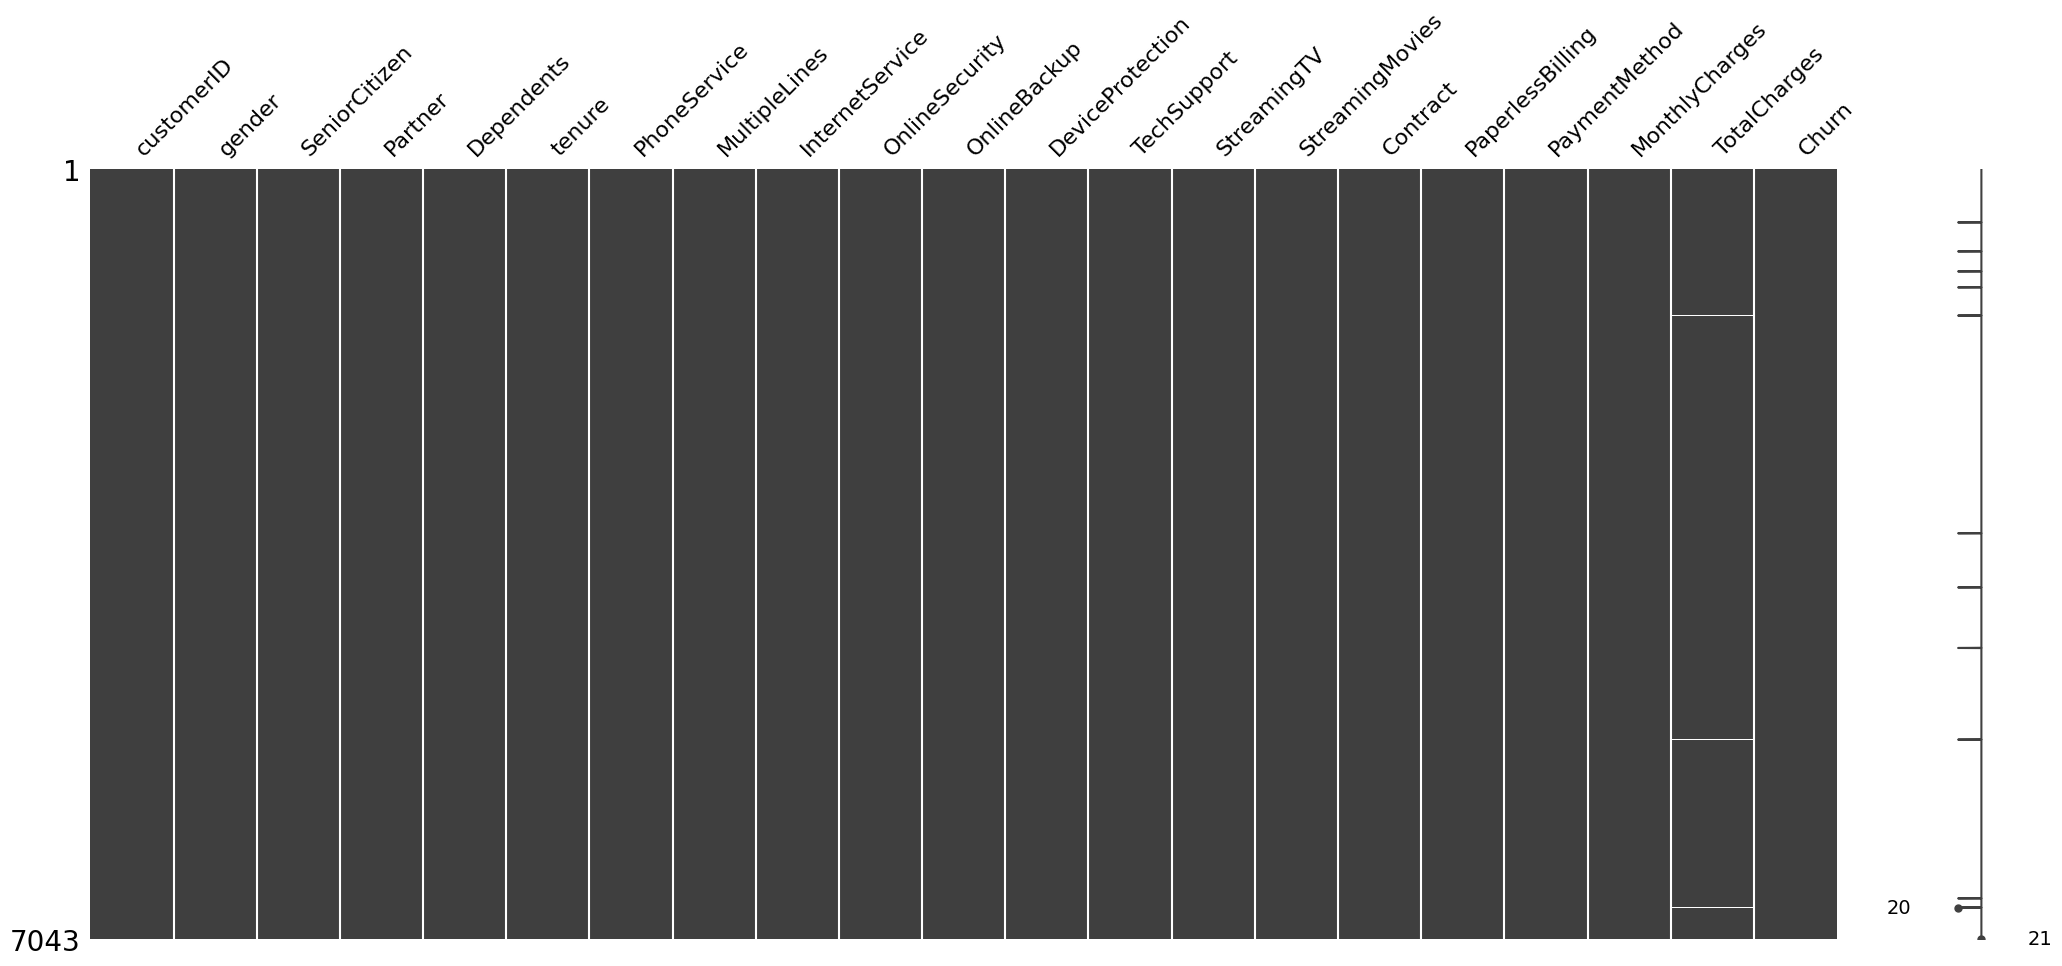

In [5]:

# 결측치 시각화
import missingno as msno
msno.matrix(df)

In [6]:
df.isna().mean()  # TotalCharges   결측치 비율은     0.001562 --> 해당 결측치 row 데이터를 삭제
print(len(df))
df = df.dropna(subset=['TotalCharges'])
print(len(df))


7043
7032


In [7]:
# 이탈여부 Churn --> yes와 no 를 1과 0으로 변경
    # 분석하기 용이함(ex. True/ False, 남/여 등 이진 변환)
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

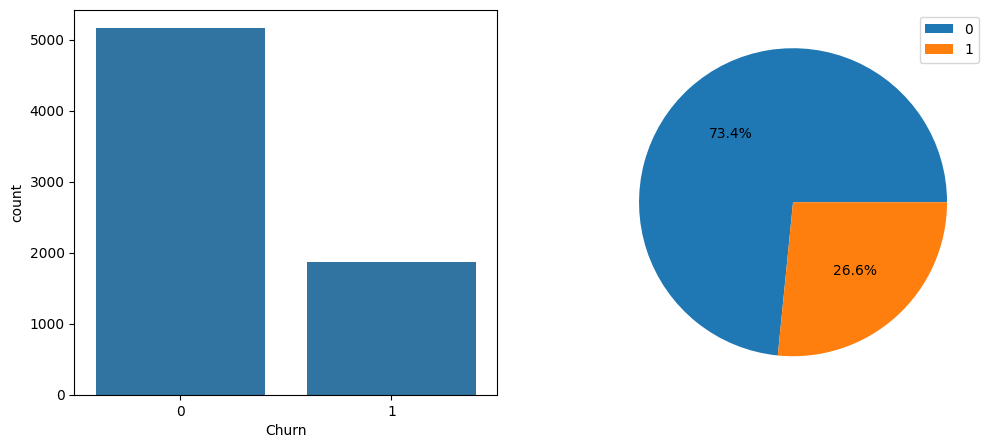

In [16]:
# 이탈고객의 현황 
# countplot
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data=df,x='Churn',ax=ax[0])
df['Churn'].value_counts()
ax[1].pie(x = df['Churn'].value_counts(),autopct='%1.1f%%')
ax[1].legend(['0','1'])
plt.show()
# 계약종류, 가입기간

<Axes: xlabel='TotalCharges_Rank', ylabel='count'>

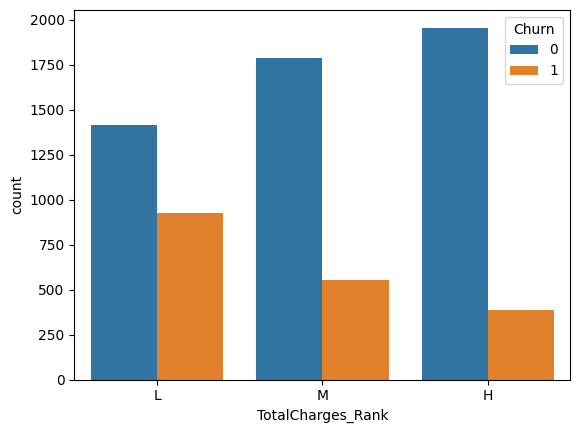

In [23]:
# 타깃이되는 변수와 같이 영향을 미치는 다른 변수와의 관계
df.head()
# 비용에따른 가입유지여부 확인
# TotalCharges 3등분해서 (H,M,L)  -> 새로운 컬럼에추가
df['TotalCharges_Rank'] = pd.qcut(df['TotalCharges'], q=3, labels=['L','M','H'])
df.tail()
# 새로운컬럼별 가입여부에대한 groupby 를 해서 시각화 까지
sns.countplot(data=df, x='TotalCharges_Rank',hue='Churn')

In [ ]:
# 계약 종류(Contract)에 따른 고객 분포
# 가입 기간(tenure) 분포
# 계약 종류에 따른 이탈률
# 가입 기간에 따른 이탈률
# 월 요금에 따른 이탈률
# 상관관계 분석 (Correlation Analysis)